In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 每一列分别表示用户ID，购买日期，购买数量，购买总额
columns = ['use_id', 'order_date', 'order_number', 'order_acount']

In [3]:
cdnow = pd.read_table('CDNOW.txt', names = columns, sep = '\s+')

In [4]:
# 查看数据
cdnow.head()

,use_id,order_date,order_number,order_acount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [5]:
# 总共有69659行数据，共四列
cdnow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
use_id          69659 non-null int64
order_date      69659 non-null int64
order_number    69659 non-null int64
order_acount    69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


## 购买数量和购买金额分析

In [8]:
# 用describe方法查看统计型数据
cdnow[['order_number', 'order_acount']].describe()

,order_number,order_acount
count,69659.000000,69659.000000
mean,2.410040,35.893648
std,2.333924,36.281942
min,1.000000,0.000000
25%,1.000000,14.490000
50%,2.000000,25.980000
75%,3.000000,43.700000
max,99.000000,1286.010000


上述结果说明大部分用户单次购买不超过三件，大部分用户购买金额值都不高

In [9]:
# 根据用户分组查看购买数量和购买金额的统计量
cdnow.groupby('use_id').sum()[['order_number', 'order_acount']].describe()

,order_number,order_acount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


上述结果可以看到，每个用户平均购买数量为7，最多为1033，平均消费金额106，中位数仅43，因此存在少量高额消费用户

## 订单数量和金额趋势分析

In [10]:
# 将数据中的时间数字转换为日期格式，方便分析
from datetime import datetime
cdnow['order_date'] = pd.to_datetime(cdnow.order_date, format = '%Y%m%d')

In [11]:
# 增加一列，显示月初，以便后续聚合操作
cdnow['month'] = cdnow.order_date.astype('datetime64[M]')

In [12]:
cdnow.head()

,use_id,order_date,order_number,order_acount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000938A128>,
      dtype=object)

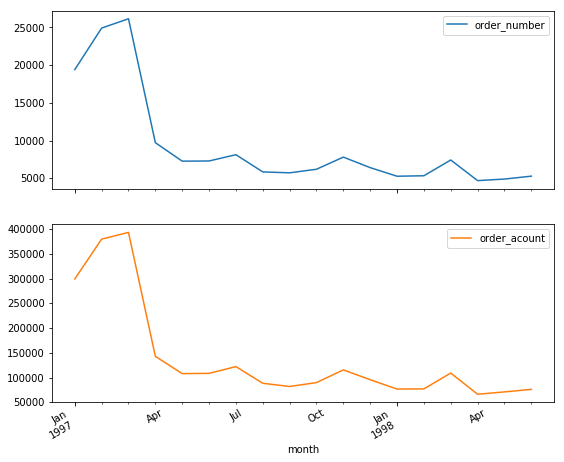

In [17]:
# 按月查看消费额
cdnow.groupby('month')[['order_number', 'order_acount']].sum().plot(kind = 'line', subplots = True, figsize = (9, 8))

从图中可以看出销量和消费总额在1月-4月较高

## 各用户第一次购买和最后一次购买时间分析

In [20]:
# 用户第一次消费时间
cdnow.groupby('use_id')['month'].min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [21]:
# 用户最后一次消费时间
cdnow.groupby('use_id')['month'].max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

## 各月复购率、回购率分析

In [22]:
# 复购率指某时间内消费两次及以上用户所占的比例
# 按月分析，消费两次以上记为1，消费一次记为0，无消费记为NaN
# 使用数据透视表
pivoted_counts = cdnow.pivot_table(index = 'use_id', columns = 'month', values = 'order_date', aggfunc = 'count').fillna(0)

In [23]:
column_month = cdnow['month'].astype('str').sort_values().unique()

In [24]:
# 重命名列
pivoted_counts.columns = column_month

In [25]:
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
use_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
pivoted_counts_re = pivoted_counts.applymap(lambda x: 1 if x > 1 else np.NaN if x == 0 else 0)

In [27]:
pivoted_counts_re.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
use_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


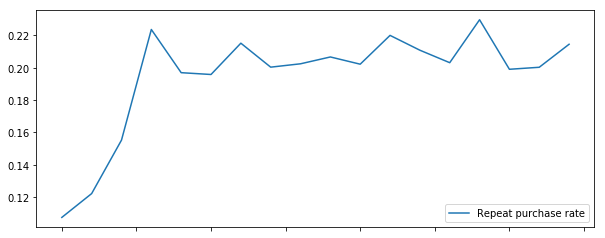

In [32]:
# 用折线图表示复购率
pd.DataFrame(pivoted_counts_re.sum() /pivoted_counts_re.count(), columns = [u'Repeat purchase rate'] ).plot(figsize = (10, 4))

可看出在最开始的时候，新用户大量加入，复购率不高，后期复购率上升，逐渐出现较多的忠实客户

In [33]:
# 回购率指某一段时间内消费的用户，在下一个时段内仍消费的比例
pivoted_amount = cdnow.pivot_table(index = 'use_id', columns = 'month', values = 'order_acount', aggfunc = 'mean').fillna(0)

In [34]:
column_month = cdnow.month.sort_values().astype('str').unique()

In [35]:
pivoted_amount.columns = column_month

In [36]:
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
use_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [37]:
# 某月内有消费记录记为1，没有记为0
pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x > 0 else 0)

In [38]:
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
use_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [43]:
# 定义函数判断上月是否有消费
def purchase_last(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i + 1] == 1:
                status.append(1)
            if data[i + 1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status

In [44]:
from pandas import DataFrame

In [45]:
pivoted_purchase_return = pivoted_purchase.apply(purchase_last, axis = 1)

In [47]:
column_month = cdnow.month.sort_values().astype('str').unique()

In [48]:
use_id = pivoted_purchase.index

In [49]:
pivoted_purchase_return1 = pd.DataFrame(list(pivoted_purchase_return),columns = column_month, index = use_id)

In [50]:
pivoted_purchase_return1.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
use_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


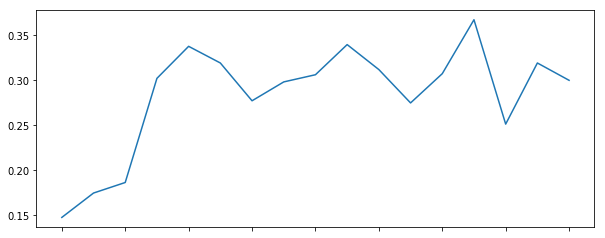

In [51]:
pivoted_purchase_return1.mean().plot(figsize = (10,4))

## 用户分类及消费分析

In [52]:
# 如果本月没有消费，还要额外判断他是不是新用户，如果一直不是新用户，则延续之前的状态，设置为unreg。
# 如果本月有消费，则需判断是不是第一次消费以及上一个时间段的消费状态。
def active_ststus(data):
    status = []
    for i in range(18):
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        #若本月有消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status

In [53]:
pivoted_purchase_status = pivoted_purchase.apply(lambda x: active_ststus(x), axis = 1)

In [55]:
column_month = cdnow.month.sort_values().astype('str').unique()
use_id = pivoted_purchase.index
pivoted_purchase_status1 = pd.DataFrame(list(pivoted_purchase_status),columns = column_month, index = use_id)
pivoted_purchase_status1.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
use_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [56]:
purchase_status1_counts = pivoted_purchase_status1.replace('unreg', np.NaN).apply(pd.value_counts)
#把unreg状态排除掉，然后计算不同分层每月的统计量
purchase_status1_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1155.0,1680,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624,632.0,512.0,472.0,569.0,517.0,458.0,446.0
new,7814.0,8455.0,7231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1402,1232.0,1025.0,1079.0,1489.0,919.0,1030.0,1060.0
unactive,NaN,6659.0,13994,20678.0,21286.0,21161.0,21320.0,21728.0,21761.0,21661.0,21474,21638.0,21965.0,21951.0,21444.0,22066.0,22014.0,21996.0


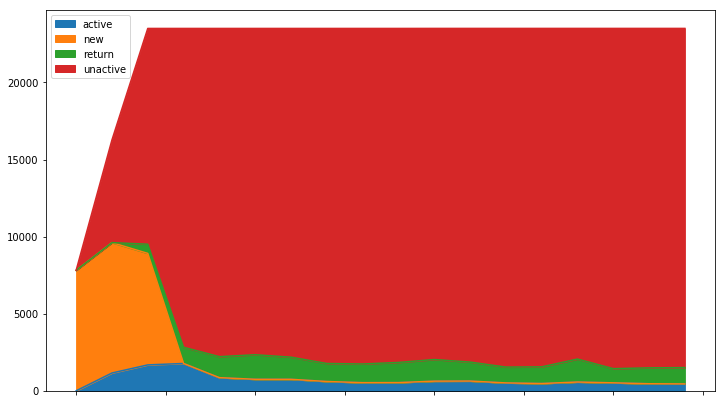

In [57]:
purchase_status1_counts.fillna(0).T.plot.area(figsize = (12,7))

In [58]:
return_rate = purchase_status1_counts.apply(lambda x: x/x.sum())

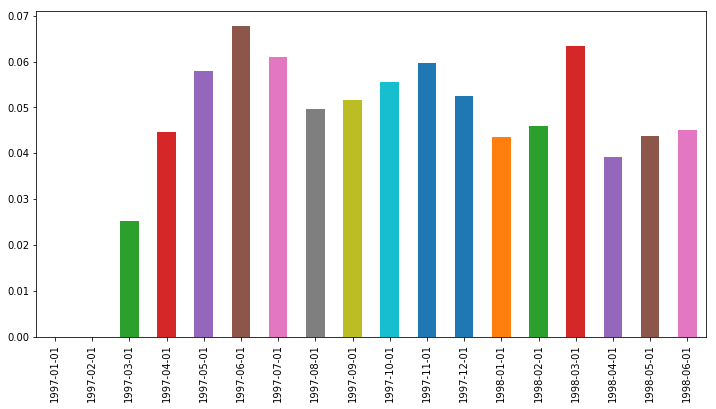

In [59]:
#每个月回流用户占比
return_rate.loc['return'].plot.bar(figsize = (12,6))

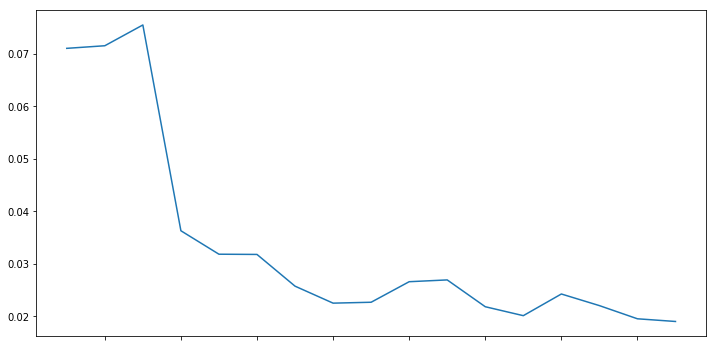

In [60]:
# 每月活跃用户占比
return_rate.loc['active'].plot(figsize = (12,6))

## 用户生命周期分析

In [61]:
# 计算生命周期：第一次消费到最后一次消费的时间差
user_purchase = cdnow[['use_id', 'order_number', 'order_acount', 'order_date']]

In [62]:
order_date_min = user_purchase.groupby('use_id').order_date.min()

In [63]:
order_date_max = user_purchase.groupby('use_id').order_date.max()

In [64]:
(order_date_max-order_date_min).head(10)

use_id
1      0 days
2      0 days
3    511 days
4    345 days
5    367 days
6      0 days
7    445 days
8    452 days
9    523 days
10     0 days
Name: order_date, dtype: timedelta64[ns]

In [65]:
# 得到用户生命周期平均为134天
(order_date_max - order_date_min).mean()

Timedelta('134 days 20:55:36.987696')

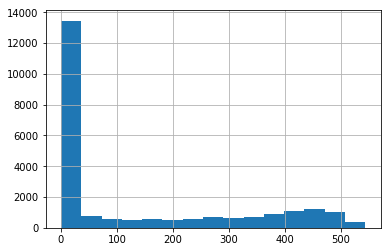

In [70]:
# 以天为单位
((order_date_max - order_date_min) / np.timedelta64(1, 'D')).hist(bins = 15)

In [71]:
# 去掉生命周期为0的用户
life_time = (order_date_max-order_date_min).reset_index() #转换为dataframe类型
life_time.head()

,use_id,order_date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


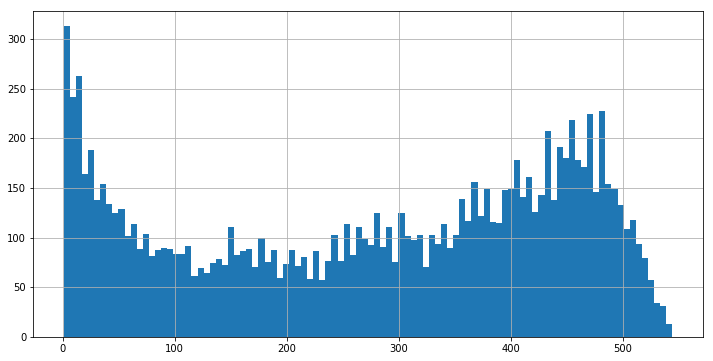

In [72]:
life_time['life_time'] = life_time.order_date/np.timedelta64(1,'D')
life_time[life_time.life_time>0].life_time.hist(bins = 100, figsize = (12,6))

用户生命周期呈现双峰趋势图，部分用户虽然消费了两次但无法持续，在用户首次消费30天内应该尽量引导。

少部分用户集中在50天～300天，属于普通型的生命周期，高质量用户的生命周期集中在400天以后，属于忠诚用户。

In [73]:
# 消费两次以上用户的生命周期是276天，高于总体的134天。
life_time[life_time.life_time>0].life_time.mean()

276.0448072247308

## 计算留存率

In [74]:
# 留存率指用户第一次消费后，有多少比率进行第二次消费
user_purchase_retention = pd.merge(left = user_purchase, right = order_date_min.reset_index(),
                                   how = 'inner', on = 'use_id',
                                   suffixes = ('', '_min')
                                  )
user_purchase_retention.head()

,use_id,order_number,order_acount,order_date,order_date_min
0,1,1,11.77,1997-01-01,1997-01-01
1,2,1,12.00,1997-01-12,1997-01-12
2,2,5,77.00,1997-01-12,1997-01-12
3,3,2,20.76,1997-01-02,1997-01-02
4,3,2,20.76,1997-03-30,1997-01-02


In [75]:
user_purchase_retention['order_date_diff'] = user_purchase_retention.order_date-user_purchase_retention.order_date_min
#将日期转化为时间
user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(lambda x: x/np.timedelta64(1,'D')) #日期转换为时间
user_purchase_retention.head()

,use_id,order_number,order_acount,order_date,order_date_min,order_date_diff,date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0


In [76]:
bin = [0,3,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff, bins = bin)
user_purchase_retention.head(10)

,use_id,order_number,order_acount,order_date,order_date_min,order_date_diff,date_diff,date_diff_bin
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0,NaN
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0,NaN
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0,NaN
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0,NaN
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0,"(60, 90]"
5,3,2,19.54,1997-04-02,1997-01-02,90 days,90.0,"(60, 90]"
6,3,5,57.45,1997-11-15,1997-01-02,317 days,317.0,"(180, 365]"
7,3,4,20.96,1997-11-25,1997-01-02,327 days,327.0,"(180, 365]"
8,3,1,16.99,1998-05-28,1997-01-02,511 days,511.0,NaN
9,4,2,29.33,1997-01-01,1997-01-01,0 days,0.0,NaN


In [78]:
# 数据透视，结果是用户在第一次消费之后，在后续各时间段内的消费总额
pivoted_retention = user_purchase_retention.pivot_table(index = 'use_id', columns = 'date_diff_bin',
                                                       values = 'order_acount', aggfunc = sum, dropna = False)
pivoted_retention.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
use_id,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,40.3,NaN,78.41
4,NaN,NaN,NaN,29.73,NaN,NaN,NaN,41.44
5,NaN,NaN,13.97,NaN,38.9,NaN,110.4,155.54


In [79]:
pivoted_retention.mean()

date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

In [80]:
# 看有多少用户比例在初次购买后0-3天内再次消费
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x: 1 if x>0 else 0)
pivoted_retention_trans.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
use_id,,,,,,,,
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,1
5,0,0,1,0,1,0,1,1


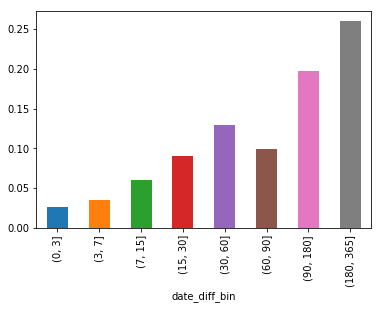

In [82]:
pivoted_retention_trans.mean().plot.bar()

## 用户平均消费间隔

In [84]:
#计算用户的消费间隔
def diff(group):
    d = group.date_diff - group.date_diff.shift(-1)
    #shift(-1)是向下便宜一个位置；shift()是向上偏移一个位置；加参数axis=1则是左右偏移
    return d
last_diff = user_purchase_retention.groupby('use_id').apply(diff)
last_diff.head(10).reset_index()

,use_id,level_1,date_diff
0,1,0,NaN
1,2,1,0.0
2,2,2,NaN
3,3,3,-87.0
4,3,4,-3.0
5,3,5,-227.0
6,3,6,-10.0
7,3,7,-184.0
8,3,8,NaN
9,4,9,-17.0


In [85]:
last_diff.mean()

-68.97376814424265

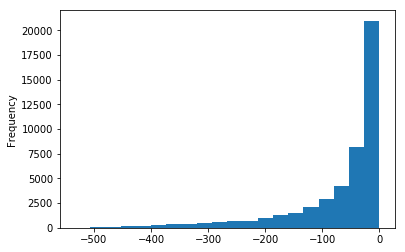

In [87]:
last_diff.plot.hist(bins = 20)